# Feature Engineering Presentation



Dataset Link:

In [1]:
#Preparation cell

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

%matplotlib inline

**ATM Dataset used for this research**

In [2]:
atm_data = pd.read_csv('../data/aggregated_atm_data.csv')
atm_data

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH
...,...,...,...,...,...,...,...,...,...,...,...,...
11584,Big Street ATM,29-09-2017,137,34,103,468800,146200,322600,FRIDAY,H,H,WHH
11585,Mount Road ATM,29-09-2017,79,27,52,305100,172500,132600,FRIDAY,H,H,WHH
11586,Airport ATM,29-09-2017,117,77,40,709900,576800,133100,FRIDAY,H,H,WHH
11587,KK Nagar ATM,29-09-2017,76,48,28,408700,279900,128800,FRIDAY,H,H,WHH


**THE FOLLOWING ANOMALIES WERE FOUND IN THE ABOVE DATASET:**
    <br>
    **1 Different Date Time formats**
    <br>
    **2 Inaccurate weekdays marked**
    <br>
    **3 Wrongly marked Holidays**
    
**For each of these anomalies, We applied the following fixes.**

## Fixing the DateTime format

These are, d/m/yyyy and dd-mm-yyyy

In [3]:
atm_data = pd.read_csv('../data/aggregated_atm_data.csv')
bs_data = atm_data[atm_data['ATM Name'] == 'Big Street ATM']
bs_data.head(20)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
5,Big Street ATM,2/1/2011,17,5,12,52800,20900,31900,Sunday,NH,H,HHW
10,Big Street ATM,3/1/2011,24,21,3,88100,77100,11000,Monday,NH,W,WWW
15,Big Street ATM,4/1/2011,34,12,22,101600,51200,50400,Tuesday,NH,W,WWW
20,Big Street ATM,5/1/2011,30,14,16,98000,52700,45300,Wednesday,NH,W,WWW
25,Big Street ATM,6/1/2011,29,16,13,85900,54400,31500,Thursday,NH,W,WWW
30,Big Street ATM,7/1/2011,23,13,10,76500,50600,25900,Friday,NH,W,WWW
35,Big Street ATM,8/1/2011,37,17,20,128600,54200,74400,Saturday,NH,H,WHH
40,Big Street ATM,9/1/2011,36,17,19,89000,37600,51400,Sunday,NH,H,HHW
45,Big Street ATM,10/1/2011,29,14,15,89800,60500,29300,Monday,NH,W,HWW


### Converting one of the formats into the other
Converting formats of type d/m/yyyy into dd-mm-yyyy, so that we can finally convert it to a datetime column

In [4]:
def dateformat_fixer(date):
    # If its part of the first format, convert it to the second one
    if '/' in date:
        date_parts = date.split('/')
        
        year = date_parts[2]
        month = date_parts[1]
        day = date_parts[0]
        
        if int(month) < 10:
            month = '0' + month
        if int(day) < 10:
            day = '0' + day
        
        return day + '-' + month + '-' + year
    # If its already in second format, keep it as it is
    else:
        return date

atm_data = pd.read_csv('../data/aggregated_atm_data.csv')
atm_data['Transaction Date'] = atm_data.apply(lambda row: dateformat_fixer(row['Transaction Date']), axis=1)

### Notice how all the datetimes are in one format now as compared to above output

In [5]:
bs_data = atm_data[atm_data['ATM Name'] == 'Big Street ATM']

bs_data.head(20)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,01-01-2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
5,Big Street ATM,02-01-2011,17,5,12,52800,20900,31900,Sunday,NH,H,HHW
10,Big Street ATM,03-01-2011,24,21,3,88100,77100,11000,Monday,NH,W,WWW
15,Big Street ATM,04-01-2011,34,12,22,101600,51200,50400,Tuesday,NH,W,WWW
20,Big Street ATM,05-01-2011,30,14,16,98000,52700,45300,Wednesday,NH,W,WWW
25,Big Street ATM,06-01-2011,29,16,13,85900,54400,31500,Thursday,NH,W,WWW
30,Big Street ATM,07-01-2011,23,13,10,76500,50600,25900,Friday,NH,W,WWW
35,Big Street ATM,08-01-2011,37,17,20,128600,54200,74400,Saturday,NH,H,WHH
40,Big Street ATM,09-01-2011,36,17,19,89000,37600,51400,Sunday,NH,H,HHW
45,Big Street ATM,10-01-2011,29,14,15,89800,60500,29300,Monday,NH,W,HWW


Now we can convert Transaction Date to datetime column by providing the format as %d-%m-%Y

In [6]:
atm_data['Transaction Date'] = pd.to_datetime(atm_data['Transaction Date'], format='%d-%m-%Y')

bs_data = atm_data[atm_data['ATM Name'] == 'Big Street ATM']

bs_data.head(40)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,Saturday,H,H,WHH
5,Big Street ATM,2011-01-02,17,5,12,52800,20900,31900,Sunday,NH,H,HHW
10,Big Street ATM,2011-01-03,24,21,3,88100,77100,11000,Monday,NH,W,WWW
15,Big Street ATM,2011-01-04,34,12,22,101600,51200,50400,Tuesday,NH,W,WWW
20,Big Street ATM,2011-01-05,30,14,16,98000,52700,45300,Wednesday,NH,W,WWW
25,Big Street ATM,2011-01-06,29,16,13,85900,54400,31500,Thursday,NH,W,WWW
30,Big Street ATM,2011-01-07,23,13,10,76500,50600,25900,Friday,NH,W,WWW
35,Big Street ATM,2011-01-08,37,17,20,128600,54200,74400,Saturday,NH,H,WHH
40,Big Street ATM,2011-01-09,36,17,19,89000,37600,51400,Sunday,NH,H,HHW
45,Big Street ATM,2011-01-10,29,14,15,89800,60500,29300,Monday,NH,W,HWW


 ## Merging Weather with ATM Data
 
 **While Fixing these faults we realise that the dataset would require some distinctive external help**  


Columns and their meanings
<ul>
<li> UV Index = The amount of UV Radiation falling as an index, has values ranging from 0 (at night) to 11 or 12 at noon. </li>
<li> SunHour = Number of hours sunshine was available for the day </li>
<li> moonIllumination = Describes the phase of the moon by describing how much illumination it provides
(0 = No Moon, 100 = Full Moon) </li>
<li> Cloud Cover = I suppose this is also in % like moonIllumination </li>
<li> Humidity = Also a % </li>
<li> PrecipiMM = The amount of precipitation in mm (Basically RAINFALL COLUMN) </li>
<li> pressure = Atmospheric Pressure on Sea Level </li>
<li> visibility = It is a measure of the distance at which an object or light can be clearly discerned.
(Probably in kms) </li>
<li> Wind direction = It is typically reported in degrees, and describes the direction from which the wind emanates
(going to drop this for now) </li>
<li> Rest all columns are directly understood </li>
</ul>

**Importing the weather data and making proper alterations to be merged with parent dataset. Keeping only relevant columns.**

In [7]:
weather_data = pd.read_csv('../data/mysore_weather.csv')
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], format='%Y-%m-%d')
weather_data.drop('totalSnow_cm', axis=1, inplace=True)

In [8]:
weather_data.head()

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2009-01-01,28,11,11.6,5,31,10:01 AM,10:07 PM,06:44 AM,06:09 PM,...,10,1,62,0.0,1013,28,9,87,6,mysore
1,2009-01-02,28,12,11.6,5,38,10:38 AM,10:55 PM,06:45 AM,06:10 PM,...,10,4,65,0.0,1014,28,9,81,6,mysore
2,2009-01-03,27,13,11.6,5,45,11:15 AM,11:44 PM,06:45 AM,06:11 PM,...,11,27,71,0.0,1014,27,9,94,7,mysore
3,2009-01-04,28,14,11.6,6,52,11:54 AM,No moonset,06:45 AM,06:11 PM,...,10,19,65,0.0,1014,28,9,93,6,mysore
4,2009-01-05,28,13,11.6,6,60,12:36 PM,12:34 AM,06:46 AM,06:12 PM,...,10,7,64,0.0,1012,28,9,106,6,mysore


**Performing an inner join as we want to retain the atm data and only append the weather data based on date.**


In [9]:
atm_data['Weekday'] = atm_data['Weekday'].str.upper()

combined_data = pd.merge(atm_data, weather_data, how='inner', left_on='Transaction Date', right_on='date_time')
combined_data.drop(['date_time', 'location'], axis=1, inplace=True)

**Looking at only Big street ATM.**

In [10]:
bs_data = combined_data[combined_data['ATM Name'] == 'Big Street ATM']

bs_data.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,SATURDAY,H,...,23,6,16,70,0.1,1009,29,9,128,3
5,Big Street ATM,2011-01-02,17,5,12,52800,20900,31900,SUNDAY,NH,...,23,7,18,69,0.0,1010,29,9,139,4
10,Big Street ATM,2011-01-03,24,21,3,88100,77100,11000,MONDAY,NH,...,22,13,39,74,0.1,1011,28,9,89,9
15,Big Street ATM,2011-01-04,34,12,22,101600,51200,50400,TUESDAY,NH,...,22,12,34,72,0.0,1011,28,9,85,8
20,Big Street ATM,2011-01-05,30,14,16,98000,52700,45300,WEDNESDAY,NH,...,21,9,60,82,1.0,1011,26,7,82,7


**A brief description of the nature of values of columns in the combined dataset.**

In [11]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11589 entries, 0 to 11588
Data columns (total 34 columns):
ATM Name                        11589 non-null object
Transaction Date                11589 non-null datetime64[ns]
No Of Withdrawals               11589 non-null int64
No Of XYZ Card Withdrawals      11589 non-null int64
No Of Other Card Withdrawals    11589 non-null int64
Total amount Withdrawn          11589 non-null int64
Amount withdrawn XYZ Card       11589 non-null int64
Amount withdrawn Other Card     11589 non-null int64
Weekday                         11589 non-null object
Festival Religion               11589 non-null object
Working Day                     11589 non-null object
Holiday Sequence                11589 non-null object
maxtempC                        11589 non-null int64
mintempC                        11589 non-null int64
sunHour                         11589 non-null float64
uvIndex                         11589 non-null int64
moon_illumination          

Turning it into a csv file for easy use in future.

In [12]:
combined_data.to_csv('../data/aggregated_atm_data_with_weather_data.csv', index=False)

### Finding out Correlated Columns in Weather Data

**The following correlation map shows us which columns have more correlation between these individual features/columns based on which we can get rid of similar columns.**

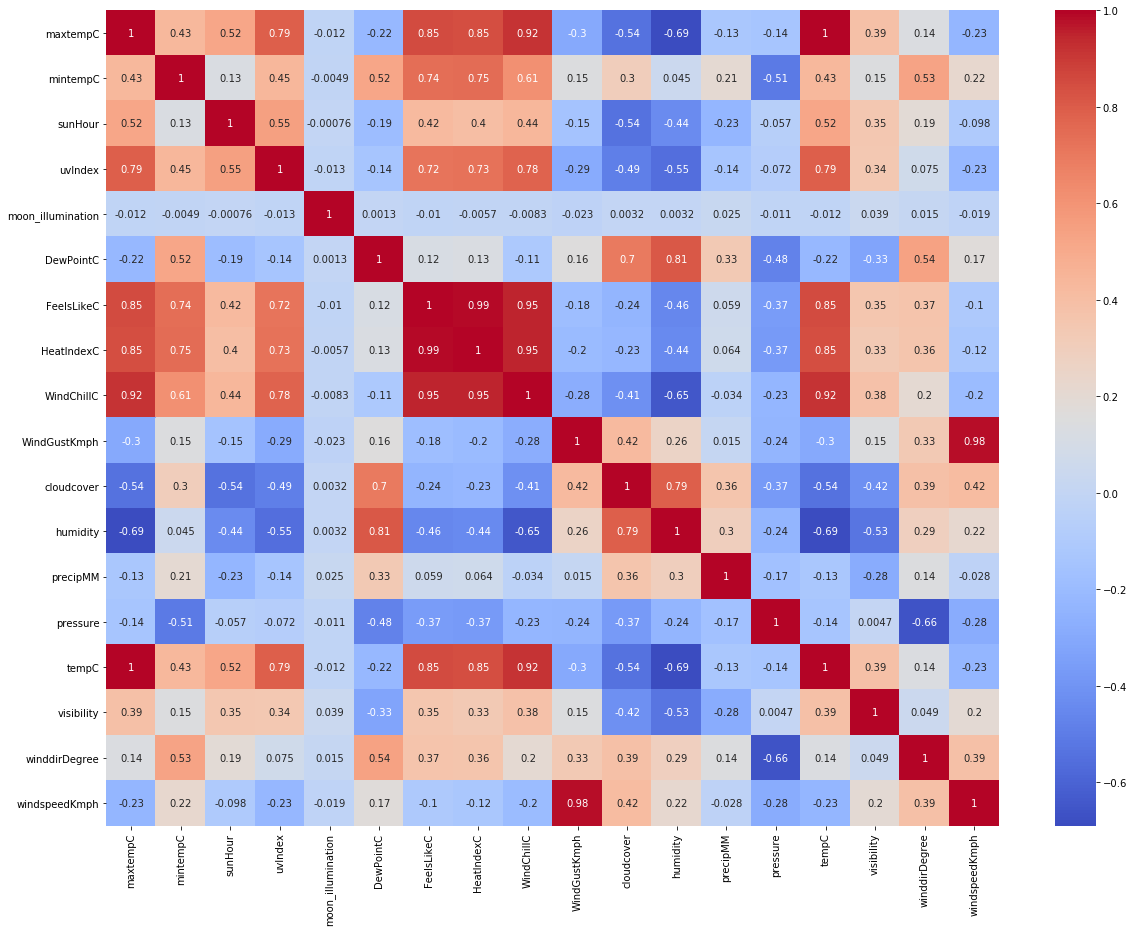

In [13]:
plt.figure(figsize=(20, 15))
sns.heatmap(weather_data.corr(), cmap='coolwarm', annot=True)


Finds all columns that are correlated with other columns by atleast 0.8 (this value can be changed by adjusting the variable value) and stores it in a dictionary, such that each (key, value) pair has correlation > 0.8

In [14]:
max_correlation_allowed = 0.8
correlated_columns = {}
weather_data_corr_df = weather_data.corr()

# For each column check which row indices are highly correlated
for column in weather_data_corr_df.columns:
    # Note: name attribute for a row in apply() function returns index, but doesn't have much use elsewhere
    correlated_columns[column] = weather_data_corr_df[weather_data_corr_df.apply(lambda x: x[column] > max_correlation_allowed 
                                                    and column != x.name, axis=1)].index.tolist()

**List of Highly correlated columns:**

In [15]:
correlated_columns

{'maxtempC': ['FeelsLikeC', 'HeatIndexC', 'WindChillC', 'tempC'],
 'mintempC': [],
 'sunHour': [],
 'uvIndex': [],
 'moon_illumination': [],
 'DewPointC': ['humidity'],
 'FeelsLikeC': ['maxtempC', 'HeatIndexC', 'WindChillC', 'tempC'],
 'HeatIndexC': ['maxtempC', 'FeelsLikeC', 'WindChillC', 'tempC'],
 'WindChillC': ['maxtempC', 'FeelsLikeC', 'HeatIndexC', 'tempC'],
 'WindGustKmph': ['windspeedKmph'],
 'cloudcover': [],
 'humidity': ['DewPointC'],
 'precipMM': [],
 'pressure': [],
 'tempC': ['maxtempC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC'],
 'visibility': [],
 'winddirDegree': [],
 'windspeedKmph': ['WindGustKmph']}

 ### Converting Precipitation to Rain Status based on the conditions described in next cell
 <h4> Source: Wikipedia </h4>

    Light rain — when the precipitation rate is < 2.5 mm (0.098 in) per hour
    Moderate rain — when the precipitation rate is between 2.5 mm (0.098 in) - 7.6 mm (0.30 in) or 10 mm (0.39 in) per hour
    Heavy rain — when the precipitation rate is > 7.6 mm (0.30 in) per hour or between 10 mm (0.39 in) and 50 mm (2.0 in) per hour
    Violent rain — when the precipitation rate is > 50 mm (2.0 in) per hour

In [16]:
def rainfall_status_check(value):
    if value == 0:
        return "No Rain"
    elif value < 2.5:
        return "Light Rain"
    elif value <= 7.6:
        return "Moderate Rain"
    elif value <= 50:
        return "Heavy Rain"
    else:
        return "Violent Rain"

In [17]:
combined_data = pd.read_csv('../data/aggregated_atm_data_with_weather_data.csv ')
combined_data.drop(['No Of Withdrawals', 'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals', 
                    'Amount withdrawn XYZ Card', 'Amount withdrawn Other Card',
                    'maxtempC', 'HeatIndexC', 'WindChillC', 'tempC', 'WindGustKmph', 'DewPointC'], axis=1, inplace=True)

combined_data['Transaction Date'] = pd.to_datetime(combined_data['Transaction Date'])
combined_data['Day'] = combined_data['Transaction Date'].dt.day
combined_data['Month'] = combined_data['Transaction Date'].dt.month
combined_data['Year'] = combined_data['Transaction Date'].dt.year
combined_data.drop('Transaction Date', axis=1, inplace=True)

In [18]:
combined_data.drop(['moonrise', 'moonset', 'sunrise', 'sunset', 'winddirDegree', 
                    'mintempC', 'uvIndex', 'sunHour', 'FeelsLikeC', 'cloudcover',
                   'humidity', 'pressure', 'visibility', 'winddirDegree', 
                    'windspeedKmph', 'moon_illumination'], axis=1, inplace=True)

In [19]:
combined_data['Rainfall_Status'] = combined_data['precipMM'].apply(rainfall_status_check)
combined_data.drop('precipMM', axis=1, inplace=True)

From the above stated columns, we dropped majorly all columns except **precipitation** and gained the rainfall status of each day by understanding what values of precipitation meant low or heavy rainfall and asigned this to the dates of the year.
<br>Thus, it became easier to use weather data using only precipitation column as it concluded more about the weather than any other column distinctly.

### Prev Week Mean

The total amount withdrawn column is averaged up to the last 7 days indicating the weekly mean for that 7 days window.
<br> This helped us introduce another numerical feature.

<br> This mean helps the model to not overestimate the predictions based on training set instances.

In [20]:
curr_atm_data = combined_data[combined_data['ATM Name'] == "Big Street ATM"].drop(['ATM Name'], axis=1)

curr_atm_data['Prev_Week_Mean'] = curr_atm_data['Total amount Withdrawn'].rolling(window=7).mean()
curr_atm_data['Prev_Week_Mean']= curr_atm_data['Prev_Week_Mean'].fillna(value=0)
curr_atm_data

,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,Day,Month,Year,Rainfall_Status,Prev_Week_Mean
0,123800,SATURDAY,H,H,WHH,1,1,2011,Light Rain,0.000000
5,52800,SUNDAY,NH,H,HHW,2,1,2011,No Rain,0.000000
10,88100,MONDAY,NH,W,WWW,3,1,2011,Light Rain,0.000000
15,101600,TUESDAY,NH,W,WWW,4,1,2011,No Rain,0.000000
20,98000,WEDNESDAY,NH,W,WWW,5,1,2011,Light Rain,0.000000
...,...,...,...,...,...,...,...,...,...,...
11564,513800,MONDAY,NH,W,HWW,25,9,2017,Heavy Rain,396228.571429
11569,437400,TUESDAY,NH,W,WWW,26,9,2017,Heavy Rain,393771.428571
11574,511200,WEDNESDAY,NH,W,WWW,27,9,2017,Heavy Rain,412114.285714
11579,468600,THURSDAY,NH,W,WWH,28,9,2017,Heavy Rain,461857.142857


### Generated Prev Month Mean


In [21]:
curr_atm_data = combined_data[combined_data['ATM Name'] == "Big Street ATM"].drop(['ATM Name'], axis=1)

curr_atm_data['Prev_Week_Mean'] = curr_atm_data['Total amount Withdrawn'].rolling(window=7).mean()
curr_atm_data['Prev_Week_Mean']= curr_atm_data['Prev_Week_Mean'].fillna(value=0)

curr_atm_data['Prev_Month_Mean'] = curr_atm_data['Total amount Withdrawn'].rolling(window=30).mean()
curr_atm_data['Prev_Month_Mean']= curr_atm_data['Prev_Month_Mean'].fillna(value=0)

curr_atm_data

,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,Day,Month,Year,Rainfall_Status,Prev_Week_Mean,Prev_Month_Mean
0,123800,SATURDAY,H,H,WHH,1,1,2011,Light Rain,0.000000,0.000000
5,52800,SUNDAY,NH,H,HHW,2,1,2011,No Rain,0.000000,0.000000
10,88100,MONDAY,NH,W,WWW,3,1,2011,Light Rain,0.000000,0.000000
15,101600,TUESDAY,NH,W,WWW,4,1,2011,No Rain,0.000000,0.000000
20,98000,WEDNESDAY,NH,W,WWW,5,1,2011,Light Rain,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
11564,513800,MONDAY,NH,W,HWW,25,9,2017,Heavy Rain,396228.571429,430103.333333
11569,437400,TUESDAY,NH,W,WWW,26,9,2017,Heavy Rain,393771.428571,431223.333333
11574,511200,WEDNESDAY,NH,W,WWW,27,9,2017,Heavy Rain,412114.285714,436620.000000
11579,468600,THURSDAY,NH,W,WWH,28,9,2017,Heavy Rain,461857.142857,444466.666667


### Generating Week Number feature

<a href="https://webspace.science.uu.nl/~gent0113/calendar/isocalendar.htm">The ISO 8601 Calendar</a>

It corresponds with the Gregorian calendar and uses the same year number but as its length is defined to be an integral number of weeks, its beginning can deviate up to a few days from 1 January and its end likewise can deviate up to a few days from 31 December. On average, however, it remains in step with the Gregorian calendar.

The week in the ISO calendar is defined as "A time interval of seven calendar days starting with a Monday identified by its ordinal number within its calendar year"

The numbering of the ISO calendar weeks is defined as "The first calendar week of a year is that one which includes the first Thursday of that year and the last calendar week of a calendar year is the week immediately preceding the first calendar week of the next calendar year"

According to this rule the first week of the ISO calendar year can begin **as late as 4 January and as early as 29 December of the previous year**. Likewise, the last week of the ISO calendar year can end as early as 28 December and as late as 3 January of the following year. 

**So this is why in the below output, 1st and 2nd January of 2011 have Week Number as 52 and its only from 3rd January which is a Monday that Week Number starts proper from 1**

In [22]:
combined_data = pd.read_csv('../data/aggregated_atm_data_with_weather_data.csv ')
combined_data.drop(['No Of Withdrawals', 'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals', 
                    'Amount withdrawn XYZ Card', 'Amount withdrawn Other Card',
                    'maxtempC', 'HeatIndexC', 'WindChillC', 'tempC', 'WindGustKmph', 'DewPointC'], axis=1, inplace=True)

combined_data['Transaction Date'] = pd.to_datetime(combined_data['Transaction Date'])
combined_data['Day'] = combined_data['Transaction Date'].dt.day
combined_data['Month'] = combined_data['Transaction Date'].dt.month
combined_data['Year'] = combined_data['Transaction Date'].dt.year
combined_data.drop(['moonrise', 'moonset', 'sunrise', 'sunset', 'winddirDegree', 
                    'mintempC', 'uvIndex', 'sunHour', 'FeelsLikeC', 'cloudcover',
                   'humidity', 'pressure', 'visibility', 'winddirDegree', 
                    'windspeedKmph', 'moon_illumination'], axis=1, inplace=True)
combined_data['Rainfall_Status'] = combined_data['precipMM'].apply(rainfall_status_check)
combined_data.drop('precipMM', axis=1, inplace=True)


In [23]:
curr_atm_data = combined_data[combined_data['ATM Name'] == "Big Street ATM"].drop(['ATM Name'], axis=1)
curr_atm_data['Week Number'] = curr_atm_data.apply(lambda x: x['Transaction Date'].strftime("%V"), 
                                                   axis=1)

curr_atm_data.head(15)

,Transaction Date,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,Day,Month,Year,Rainfall_Status,Week Number
0,2011-01-01,123800,SATURDAY,H,H,WHH,1,1,2011,Light Rain,52
5,2011-01-02,52800,SUNDAY,NH,H,HHW,2,1,2011,No Rain,52
10,2011-01-03,88100,MONDAY,NH,W,WWW,3,1,2011,Light Rain,01
15,2011-01-04,101600,TUESDAY,NH,W,WWW,4,1,2011,No Rain,01
20,2011-01-05,98000,WEDNESDAY,NH,W,WWW,5,1,2011,Light Rain,01
25,2011-01-06,85900,THURSDAY,NH,W,WWW,6,1,2011,Light Rain,01
30,2011-01-07,76500,FRIDAY,NH,W,WWW,7,1,2011,No Rain,01
35,2011-01-08,128600,SATURDAY,NH,H,WHH,8,1,2011,No Rain,01
40,2011-01-09,89000,SUNDAY,NH,H,HHW,9,1,2011,No Rain,01
45,2011-01-10,89800,MONDAY,NH,W,HWW,10,1,2011,No Rain,02


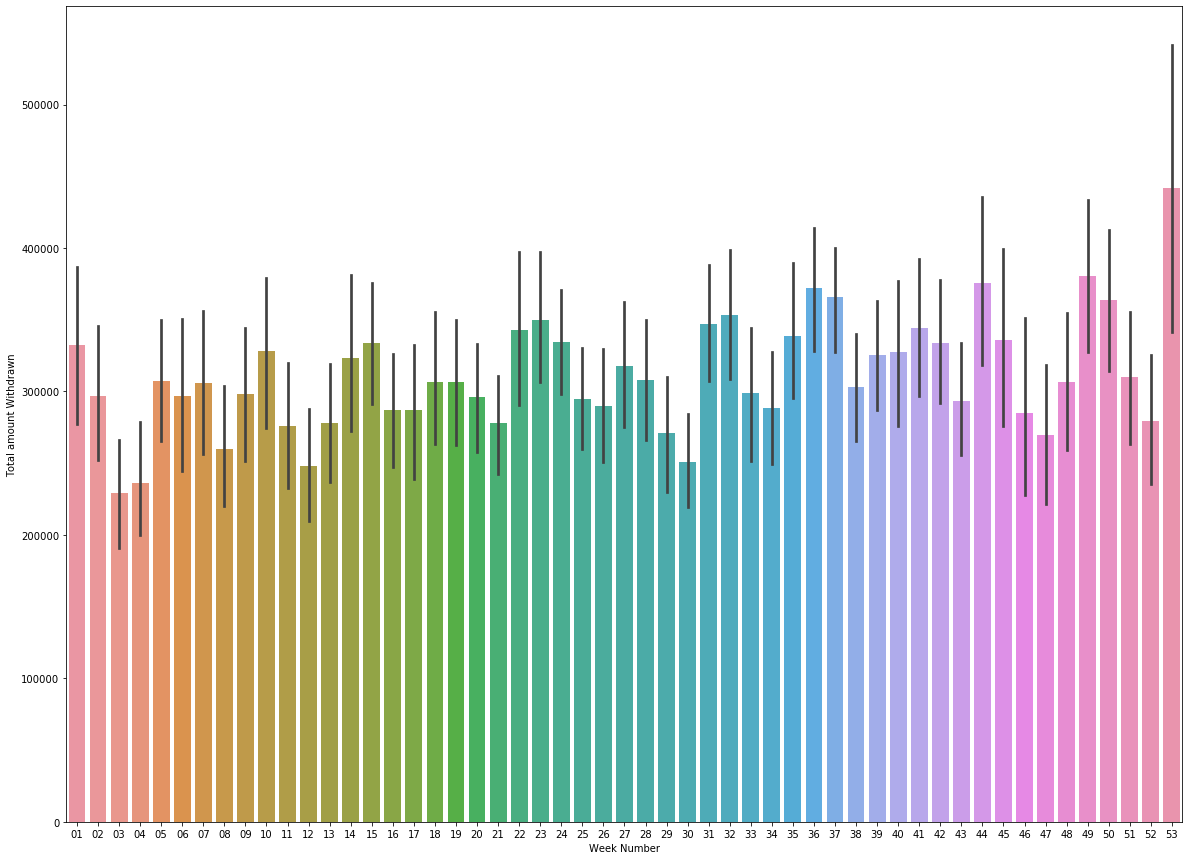

In [24]:
plt.figure(figsize=(20, 15))
sns.barplot(x = "Week Number", y = "Total amount Withdrawn", data = curr_atm_data)

## Fixing Holiday column

Since our dataset had tonnes of anomalies we had to scrape the internet for a dataset on holidays to be appended to our dataset for better yields in results. This notebook was worked on exclusively to get detailed information on the number, kinds, duration and popularity of holidays that can affect the ATM withdrawal patterns. Furthermore, logically we know this will heavily impact the withdrawals but statistically how majorly it would influence was also one of the debating question which needed to be answered.

**The following is the acquired dataset from Internet sources**

In [25]:
holiday_df_filtered = pd.read_csv('../data/holidays_in_india_2011_2017_filtered.csv')
holiday_df_filtered['Date'] = pd.to_datetime(holiday_df_filtered['Date'], format='%d-%m-%Y')

In [26]:
holiday_df_filtered.head(17)

,Date,Name,Weekday,Type
0,2011-01-01,New Year's Day,SATURDAY,Restricted Holiday
1,2011-01-05,Guru Govind Singh Jayanti,WEDNESDAY,Restricted Holiday
2,2011-01-15,Pongal,SATURDAY,Restricted Holiday
3,2011-01-26,Republic Day,WEDNESDAY,Gazetted Holiday
4,2011-02-14,Valentine's Day,MONDAY,Observance
5,2011-02-16,Milad un-Nabi/Id-e-Milad,WEDNESDAY,Gazetted Holiday
6,2011-02-19,Shivaji Jayanti,SATURDAY,Restricted Holiday
7,2011-03-02,Maha Shivaratri/Shivaratri,WEDNESDAY,Gazetted Holiday
8,2011-03-19,Holika Dahana,SATURDAY,Restricted Holiday
9,2011-03-20,Holi,SUNDAY,Gazetted Holiday


Here we can see the structure of the acquired dataset on Holidays. 'Type' column is noteworthy for classification of dates in terms of impact on the withdrawal instead of names of holidays/festivals.

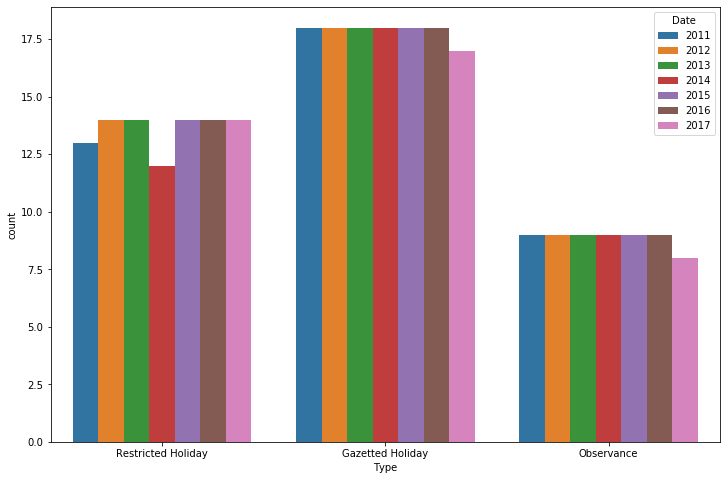

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x="Type" , hue= holiday_df_filtered['Date'].dt.year,   data=holiday_df_filtered)

### Merging Holiday Dataframe with Aggregated Data

We look at the acquired dataset for holidays corresponding to the dates in our withdrawal dataset. This dataset also has a categorical feature for the type of holiday which would structure our dataset better.

In [28]:
holiday_df_filtered_for_merge = holiday_df_filtered.drop(['Name', 'Weekday'], axis=1)
holiday_df_filtered_for_merge.head()

,Date,Type
0,2011-01-01,Restricted Holiday
1,2011-01-05,Restricted Holiday
2,2011-01-15,Restricted Holiday
3,2011-01-26,Gazetted Holiday
4,2011-02-14,Observance


In [29]:
aggregated_data = pd.read_csv('../data/aggregated_atm_data_with_weather_data.csv')
aggregated_data['Transaction Date'] = pd.to_datetime(aggregated_data['Transaction Date'], format='%Y-%m-%d')
aggregated_data.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,SATURDAY,H,...,23,6,16,70,0.1,1009,29,9,128,3
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,SATURDAY,C,...,23,6,16,70,0.1,1009,29,9,128,3
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,SATURDAY,C,...,23,6,16,70,0.1,1009,29,9,128,3
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,SATURDAY,C,...,23,6,16,70,0.1,1009,29,9,128,3
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,SATURDAY,C,...,23,6,16,70,0.1,1009,29,9,128,3


### Actual Merge Operation
Left Outer Join is performed with left = ATM Data and right = Holidays Data on the Date columns because we want to retain all rows from the ATM Data and join rows only matching date is found in Holidays Data and otherwise the holiday columns can be left with NaN

In [30]:
aggregated_data_with_holidays = aggregated_data.merge(right=holiday_df_filtered_for_merge, how='left', left_on='Transaction Date', right_on='Date')
aggregated_data_with_holidays.drop('Date', axis=1, inplace=True)

### Verifying whether number of rows before and after merge are the same

In [31]:
bs_data = aggregated_data[aggregated_data['ATM Name'] == 'Big Street ATM']
bs_data_holiday = aggregated_data_with_holidays[aggregated_data_with_holidays['ATM Name'] == 'Big Street ATM']
print(len(bs_data))
print(len(bs_data_holiday))

2354
2354


### Filling in NaN values in Type Column with No Holiday value

Because Left Outer Join was performed, all unmatched dates will have NaN in Type column of new merged DataFrame

In [32]:
aggregated_data_with_holidays.fillna(value='No Holiday', inplace=True)

aggregated_data_with_holidays.head(10)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Type
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,SATURDAY,H,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,SATURDAY,C,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,SATURDAY,C,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,SATURDAY,C,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,SATURDAY,C,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
5,Big Street ATM,2011-01-02,17,5,12,52800,20900,31900,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday
6,Mount Road ATM,2011-01-02,194,50,144,529300,171700,357600,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday
7,Airport ATM,2011-01-02,67,53,14,268600,213300,55300,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday
8,KK Nagar ATM,2011-01-02,260,155,105,809400,456200,353200,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday
9,Christ College ATM,2011-01-02,80,24,56,300000,95600,204400,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday


 ### Fixing Weekday
 
 Applying the strftime('%A') function on each row of the data on the Date column will give the correct Weekday

This fix was done as we saw a few anomalies in the weekday column where few weekdays were repeated on successive dates.

In [33]:
aggregated_data_with_holidays['Weekday'] = aggregated_data_with_holidays.apply(lambda x: x['Transaction Date'].strftime('%A').upper(), axis=1)

### Verifying whether Fix was proper (check 2012-05-01 onwards which was a problem before)

In [34]:
bs_data = aggregated_data_with_holidays[aggregated_data_with_holidays['ATM Name'] == 'Big Street ATM']
bs_data[bs_data['Festival Religion'] == 'N']


,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Type
125,Big Street ATM,2011-01-26,18,9,9,40500,22700,17800,WEDNESDAY,N,...,15,15,66,0.0,1014,30,9,85,10,Gazetted Holiday
515,Big Street ATM,2011-04-14,30,18,12,105600,59500,46100,THURSDAY,N,...,9,24,60,2.3,1010,36,10,202,6,Observance
600,Big Street ATM,2011-05-01,23,6,17,60200,19000,41200,SUNDAY,N,...,9,41,67,1.7,1009,37,7,238,6,Observance
1130,Big Street ATM,2011-08-15,4,4,0,29000,29000,0,MONDAY,N,...,14,36,75,4.5,1010,30,9,254,10,Gazetted Holiday
1370,Big Street ATM,2011-10-02,43,18,25,149000,63500,85500,SUNDAY,N,...,11,45,79,4.2,1011,30,6,258,7,Gazetted Holiday
1948,Big Street ATM,2012-01-26,33,15,18,137800,87400,50400,THURSDAY,N,...,12,0,48,0.0,1013,28,10,92,8,Gazetted Holiday
1953,Big Street ATM,2012-01-27,40,26,14,123100,88100,35000,FRIDAY,N,...,9,2,56,0.0,1013,29,10,110,6,No Holiday
2428,Big Street ATM,2012-05-01,34,6,28,154300,30000,124300,TUESDAY,N,...,15,24,71,0.7,1009,31,10,254,12,Observance
2433,Big Street ATM,2012-05-02,31,29,2,169800,169300,500,WEDNESDAY,N,...,13,23,70,5.5,1010,32,10,270,10,No Holiday
2438,Big Street ATM,2012-05-03,36,27,9,124300,106000,18300,THURSDAY,N,...,16,24,71,1.9,1009,33,10,266,12,No Holiday


### Fixing Holiday Sequence and breaking it into three columns. Also Fixing Working Day and converting it to IsHoliday

<p> A day is a Holiday only if it is a Gazetted or Restricted Holiday </p>
<p> Weekends are not considered as holidays but they still get importance because of the IsWeekday column being stored as False for Weekends </p>
<p> Logic is, for each row in the dataframe, find yesterday's date and tomorrow's date, then check whether all three of them are holidays or not, by checking whether they are present in the holidays dataframe and thus get the overall sequence for a single day and append holiday status of each day to their respective lists which would end up becoming the three new isHoliday columns in the DataFrame </p>

In [35]:
all_holiday_dates = set(holiday_df_filtered['Date'])
holiday_sequence_list = []
today_holiday_list = []
yesterday_holiday_list = []
tomorrow_holiday_list = []
for i in range(len(aggregated_data_with_holidays)):
    # iloc[row_number_index, column_number_index]
    # Transaction Date is second column so its index is 1
    today_date = aggregated_data_with_holidays.iloc[i, 1]
    yesterday_date = today_date - timedelta(days=1)
    tomorrow_date = today_date + timedelta(days=1)
    
    # Hardcode Holiday Sequence for first and last days in dataset
    if today_date == datetime(2011, 1, 1):
        holiday_sequence = 'WHH'
        
    elif today_date == datetime(2017, 12, 31):
        holiday_sequence = 'HHH'
        
    # Else for today, yesterday and tomorrow check whether they are a holiday or a weekend date, if yes, append "H", else "W"
    else:
        holiday_sequence = ""
        for date in [yesterday_date, today_date, tomorrow_date]:
            # if (date in all_holiday_dates) or (date.strftime('%A') in ['Saturday', 'Sunday']):
            if date in all_holiday_dates:
                holiday_sequence += "H"
            else:
                holiday_sequence += "W"
    
    holiday_sequence_list.append(holiday_sequence)
    yesterday_holiday_list.append(True if holiday_sequence[0] == 'H' else False)
    today_holiday_list.append(True if holiday_sequence[1] == 'H' else False)
    tomorrow_holiday_list.append(True if holiday_sequence[2] == 'H' else False)

### Adding the Holiday Sequence column
Taking a deepcopy of the dataset to append the holiday sequence generated.

In [36]:
new_agg = aggregated_data_with_holidays.copy(deep=True)
new_agg['Holiday Sequence'] = holiday_sequence_list
new_agg['isYesterdayHoliday'] = yesterday_holiday_list
new_agg['isHoliday'] = today_holiday_list
new_agg['isTomorrowHoliday'] = tomorrow_holiday_list

In [37]:
bs_data = new_agg[new_agg['ATM Name'] == 'Big Street ATM']
bs_data[['Transaction Date', 'Holiday Sequence', 'Weekday', 'Type', 'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday']][bs_data['Festival Religion'] == 'N'].head(10)

,Transaction Date,Holiday Sequence,Weekday,Type,isYesterdayHoliday,isHoliday,isTomorrowHoliday
125,2011-01-26,WHW,WEDNESDAY,Gazetted Holiday,False,True,False
515,2011-04-14,WHW,THURSDAY,Observance,False,True,False
600,2011-05-01,WHW,SUNDAY,Observance,False,True,False
1130,2011-08-15,WHW,MONDAY,Gazetted Holiday,False,True,False
1370,2011-10-02,WHW,SUNDAY,Gazetted Holiday,False,True,False
1948,2012-01-26,WHW,THURSDAY,Gazetted Holiday,False,True,False
1953,2012-01-27,HWW,FRIDAY,No Holiday,True,False,False
2428,2012-05-01,WHW,TUESDAY,Observance,False,True,False
2433,2012-05-02,HWW,WEDNESDAY,No Holiday,True,False,False
2438,2012-05-03,WWW,THURSDAY,No Holiday,False,False,False


Check 26th and 27th January 2012, they had wrong Holiday Sequences before but now its correct

### Generating Boolean columns for isYesterdayWeekday and isTomorrowWeekday


In [38]:
new_agg['isYesterdayWeekday'] = new_agg.apply(lambda x: (x['Transaction Date'] - timedelta(days=1)).strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)
new_agg['isTomorrowWeekday'] = new_agg.apply(lambda x: (x['Transaction Date'] + timedelta(days=1)).strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)
new_agg['isWeekday'] = new_agg.apply(lambda x: x['Transaction Date'].strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)

In [39]:
bs_data = new_agg[new_agg['ATM Name'] == 'Big Street ATM']
bs_data[['Transaction Date', 'Weekday', 'Type', 'isYesterdayWeekday', 'isWeekday', 'isTomorrowWeekday']].head(10)

,Transaction Date,Weekday,Type,isYesterdayWeekday,isWeekday,isTomorrowWeekday
0,2011-01-01,SATURDAY,Restricted Holiday,True,False,False
5,2011-01-02,SUNDAY,No Holiday,False,False,True
10,2011-01-03,MONDAY,No Holiday,False,True,True
15,2011-01-04,TUESDAY,No Holiday,True,True,True
20,2011-01-05,WEDNESDAY,Restricted Holiday,True,True,True
25,2011-01-06,THURSDAY,No Holiday,True,True,True
30,2011-01-07,FRIDAY,No Holiday,True,True,False
35,2011-01-08,SATURDAY,No Holiday,True,False,False
40,2011-01-09,SUNDAY,No Holiday,False,False,True
45,2011-01-10,MONDAY,No Holiday,False,True,True


### Checking for Correlation between new generated columns
If a few columns have no correlation with any other, we can drop them. Correlation helps us to understand what features should we work on and which features will be a determining factor in terms of running our models.

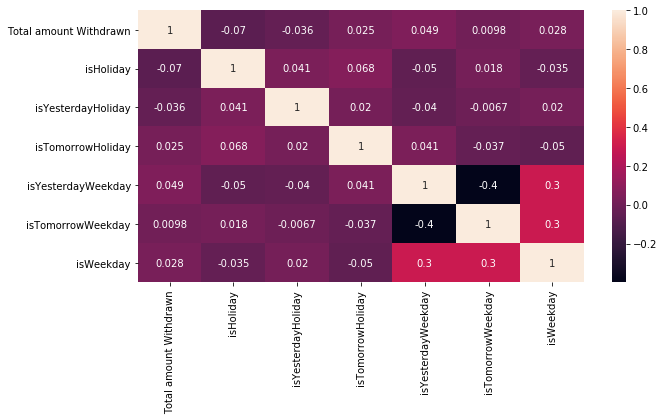

In [40]:
columns_required = ['Transaction Date', 'Total amount Withdrawn', 'Weekday', 'Type', 
                    'isHoliday', 'isYesterdayHoliday', 'isTomorrowHoliday', 'isYesterdayWeekday', 
                    'isTomorrowWeekday', 'isWeekday']

corr_atm_df = bs_data[columns_required]

plt.figure(figsize=(10, 5))
sns.heatmap(corr_atm_df.corr(), annot=True)

### Correlation
(isYesterdayWeekday, isTomorrowWeekday) have slight negative correlation and (isWeekday, isYesterdayWeekday), (isWeekday, isTomorrowWeekday) have slight positive correlation

So there is no immediate need to drop these as of yet. The current dataset is good for running the models as far as the values are concerned.

### Making Final Alterations to the original dataset
So we now include the newly obtained values and columns to our original dataset which had incorrect values or trivial columns.

In [41]:
new_agg.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Weekday', 'Festival Religion',
       'Working Day', 'Holiday Sequence', 'maxtempC', 'mintempC', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'Type',
       'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday',
       'isYesterdayWeekday', 'isTomorrowWeekday', 'isWeekday'],
      dtype='object')

### Dropping Festival Religion, Holiday Sequence & Working Day Columns

In [42]:
new_agg.drop(['Festival Religion', 'Holiday Sequence', 'Working Day'], axis=1, inplace=True)

## Writing new csv

In [43]:
new_agg.to_csv('../data/aggregated_data_cleaning_complete.csv', index=False)

### Creating a new csv that already has all the unnecessary columns dropped and Rainfall Status column added

In [44]:
new_cleaned_agg = new_agg.copy(deep=True)

In [45]:
def rainfall_status_check(value):
    if value == 0:
        return "No Rain"
    elif value < 2.5:
        return "Light Rain"
    elif value <= 7.6:
        return "Moderate Rain"
    elif value <= 50:
        return "Heavy Rain"
    else:
        return "Violent Rain"

In [46]:
new_cleaned_agg['Rainfall Status'] = new_cleaned_agg['precipMM'].apply(rainfall_status_check)

In [47]:
new_cleaned_agg.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Weekday', 'maxtempC', 'mintempC',
       'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'Type', 'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday',
       'isYesterdayWeekday', 'isTomorrowWeekday', 'isWeekday',
       'Rainfall Status'],
      dtype='object')

In [48]:
new_cleaned_agg.drop(['No Of Withdrawals', 'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
                      'Amount withdrawn XYZ Card', 'Amount withdrawn Other Card', 
                      'maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
                      'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 
                      'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 
                      'visibility', 'winddirDegree', 'windspeedKmph'], axis=1, inplace=True)

## Final dataset look

This is final look of the amended dataset which has been cleaned and updated with suitable values that were obtained. Keeping most columns categorical is something that will help the model identify patterns easily and a bit accurately.

In [49]:
new_cleaned_agg.head()

,ATM Name,Transaction Date,Total amount Withdrawn,Weekday,Type,isYesterdayHoliday,isHoliday,isTomorrowHoliday,isYesterdayWeekday,isTomorrowWeekday,isWeekday,Rainfall Status
0,Big Street ATM,2011-01-01,123800,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
1,Mount Road ATM,2011-01-01,767900,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
2,Airport ATM,2011-01-01,503400,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
3,KK Nagar ATM,2011-01-01,945300,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
4,Christ College ATM,2011-01-01,287700,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain


This updated Dataset is now made into a csv file for further usage.

In [50]:
new_cleaned_agg.to_csv('../data/cleaned_data.csv', index=False)